### Импорт необходимых библиотек

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [182]:
warnings.filterwarnings('ignore')

In [183]:
pd.options.display.max_columns = 300

### Загрузим и посмотрим на данные

In [184]:
df = pd.read_csv('train.csv')

In [185]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [131]:
df.shape

(30471, 292)

### Будем использовать метрику - RMSLE. По факту, это коррень от MSLE, поэтому неважно, какую из них оптимизировать!

In [132]:
df = df.assign(log_price_doc=np.log1p(df['price_doc']))
df = df.drop(['price_doc'], axis=1)

### Обработка данных. Работа с пропусками и и элементы EDA.

In [133]:
# Удалим все колонки, связанные с 'id'
id_cols = []
for col in df.columns:
    if 'id' in col.lower():
        id_cols.append(col) 

In [134]:
id_cols

['id',
 'ID_metro',
 'ID_railroad_station_walk',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal']

In [135]:
df = df.drop(id_cols, axis=1)

In [136]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_150

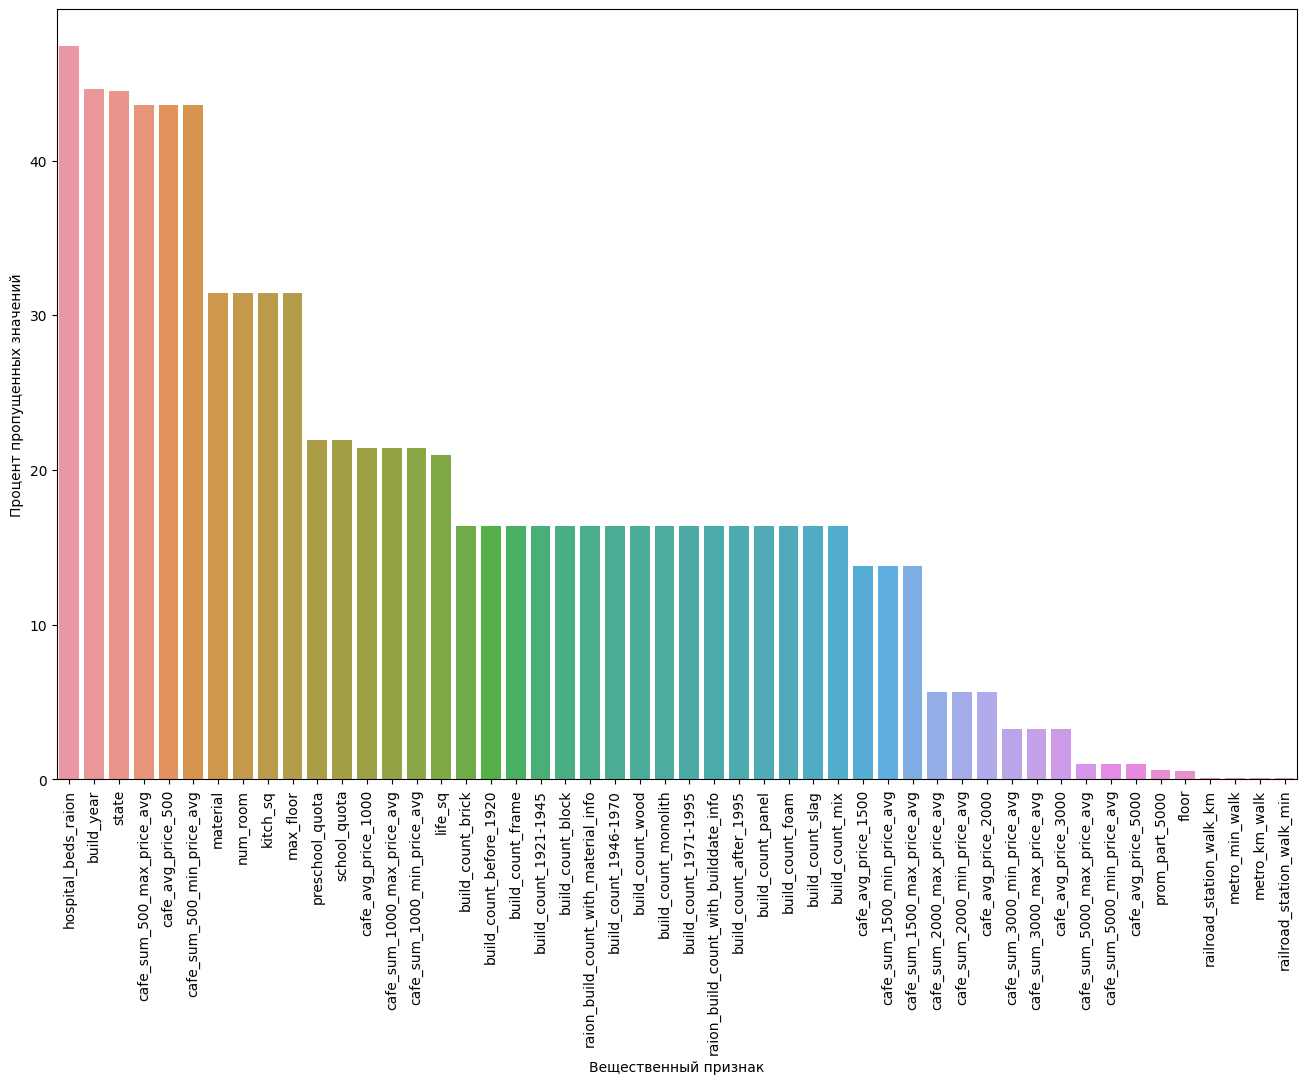

In [137]:
# Визуализируем колонки и количество пропущенных значений

numeric_cols = df.loc[:, df.dtypes != object].columns

# Пары {'Вещественный признак': 'Процент пропусков от общего количества записей'}
na_in_column = df[numeric_cols].isna().sum().sort_values(ascending=False) / df.shape[0] * 100 
# Пары, у которых процент пропусков != 0
na_in_column = na_in_column[na_in_column.values != 0]

fig = plt.figure()
fig.set_size_inches((16, 10))

sns.barplot(x=na_in_column.index, y=na_in_column.values)
plt.xlabel("Вещественный признак")
plt.ylabel("Процент пропущенных значений")
plt.xticks(rotation=90)
plt.show()

### Пропущенных значений много, поэтому удалять объекты нельзя. Нужно заполнить пропуски.

#### Рассмотрим вещественные признаки

In [138]:
# Для числовых колонок заполним все значения средним значением по колонке
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

In [139]:
# Проверяем, что пропусков нет
df[numeric_cols].isna().sum().sum()

0

In [140]:
### Изучим корелляции вещественных признаков

df[numeric_cols].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,

In [141]:
### Удалим все признаки, которые коррелируют

# Получаем пары признаков (названий колонок) нижнетреугольной матрицы корреляций
def get_redundant_pairs(df: pd.DataFrame):
    pairs_to_drop = set()
    cols = df.columns
    for i in range (df.shape[1]):
        for j in range (i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df: pd.DataFrame, n=5):
    # Получаем всевозможные комбинации колонок и их значений в матрице корреляций
    au_corr = df[numeric_cols].corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    # Удаляем значений
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(df[numeric_cols], 10)

railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_school                       7_14_all                                 1.000000
children_preschool                    0_6_all                                  1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
dtype: float64

In [142]:
# Удалим те колонки, где корреляция > 0.9

def correlation(dataset, threshold):
    col_corr = set() # Названия колонок, которые будут удалены
    numeric_cols = df.loc[:, df.dtypes != object].columns
    corr_matrix = dataset[numeric_cols].corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # Удаление колонки
    return dataset
                    
res = correlation(df, 0.9)

In [143]:
res.shape

(30471, 150)

In [144]:
# Исследуем константные и квазиконстантные признаки (признаки с малой дисперсией) с помощью методов фильтрации
from sklearn.feature_selection import VarianceThreshold

numeric_cols = df.loc[:, df.dtypes != object].columns

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_cols])
constant_cols = [x for x in numeric_cols if x not in cutter.get_feature_names_out()]

df[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


Стоит отметить, что низкая дисперсия наблюдается у признаков с маленьким масштабом (green_zone_part, indust_part, green_zone_km), поэтому не будем удалить. Оставшиеся колонки также не будем удалять, поскольку их малая дисперсия обусловлена малым множеством значений.

### Изучим категориальные колонки

In [145]:
categorical_cols = df.columns[df.dtypes == object]

In [146]:
# Видим, что пустые значения отсутствуют
df[categorical_cols].isna().sum()

timestamp                    0
product_type                 0
sub_area                     0
culture_objects_top_25       0
thermal_power_plant_raion    0
incineration_raion           0
oil_chemistry_raion          0
radiation_raion              0
railroad_terminal_raion      0
big_market_raion             0
nuclear_reactor_raion        0
detention_facility_raion     0
water_1line                  0
big_road1_1line              0
railroad_1line               0
ecology                      0
dtype: int64

Произведем `One Hot Encoding` для колонок, с количеством категорий меньше 5. Для оставшихся выполним `Mean Target Encoding` (счётчики).

In [147]:
for col in categorical_cols:
    if col != 'timestamp':
        # Считаем количество уникальных категорий в каждой колонке
        if df[col].nunique() > 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop([col], axis=1), one_hot), axis=1)
        else:
            mean_target = df.groupby(col)['log_price_doc'].mean()
            df[col] = df[col].map(mean_target)

In [148]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,sub_area_Birjulevo Vostochnoe,sub_area_Birjulevo Zapadnoe,sub_area_Bogorodskoe,sub_area_Brateevo,sub_area_Butyrskoe,sub_area_Caricyno,sub_area_Cheremushki,sub_area_Chertanovo Central'noe,sub_area_Chertanovo Juzhnoe,sub_area_Chertanovo Severnoe,sub_area_Danilovskoe,sub_area_Dmitrovskoe,sub_area_Donskoe,sub_area_Dorogomilovo,sub_area_Filevskij Park,sub_area_Fili Davydkovo,sub_area_Gagarinskoe,sub_area_Gol'janovo,sub_area_Golovinskoe,sub_area_Hamovniki,sub_area_Horoshevo-Mnevniki,sub_area_Horoshevskoe,sub_area_Hovrino,sub_area_Ivanovskoe,sub_area_Izmajlovo,sub_area_Jakimanka,sub_area_Jaroslavskoe,sub_area_Jasenevo,sub_area_Juzhnoe Butovo,sub_area_Juzhnoe Medvedkovo,sub_area_Juzhnoe Tushino,sub_area_Juzhnoportovoe,sub_area_Kapotnja,sub_area_Kon'kovo,sub_area_Koptevo,sub_area_Kosino-Uhtomskoe,sub_area_Kotlovka,sub_area_Krasnosel'skoe,sub_area_Krjukovo,sub_area_Krylatskoe,sub_area_Kuncevo,sub_area_Kurkino,sub_area_Kuz'minki,sub_area_Lefortovo,sub_area_Levoberezhnoe,sub_area_Lianozovo,sub_area_Ljublino,sub_area_Lomonosovskoe,sub_area_Losinoostrovskoe,sub_area_Mar'ina Roshha,sub_area_Mar'ino,sub_area_Marfino,sub_area_Matushkino,sub_area_Meshhanskoe,sub_area_Metrogorodok,sub_area_Mitino,sub_area_Molzhaninovskoe,sub_area_Moskvorech'e-Saburovo

In [149]:
### Поработаем с датой

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

C:\Users\xoros\AppData\Local\Temp\ipykernel_5912\837974367.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['month'] = df.timestamp.dt.month
C:\Users\xoros\AppData\Local\Temp\ipykernel_5912\837974367.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year'] = df.timestamp.dt.year


In [150]:
# Т.к. данные имеют временную структуру, сортируем их по признаку timestamp

df = df.sort_values('timestamp')

### Визуализация

In [151]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,water_1line,mkad_km,ttk_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,sub_area_Birjulevo Vostochnoe,sub_area_Birjulevo Zapadnoe,sub_area_Bogorodskoe,sub_area_Brateevo,sub_area_Butyrskoe,sub_area_Caricyno,sub_area_Cheremushki,sub_area_Chertanovo Central'noe,sub_area_Chertanovo Juzhnoe,sub_area_Chertanovo Severnoe,sub_area_Danilovskoe,sub_area_Dmitrovskoe,sub_area_Donskoe,sub_area_Dorogomilovo,sub_area_Filevskij Park,sub_area_Fili Davydkovo,sub_area_Gagarinskoe,sub_area_Gol'janovo,sub_area_Golovinskoe,sub_area_Hamovniki,sub_area_Horoshevo-Mnevniki,sub_area_Horoshevskoe,sub_area_Hovrino,sub_area_Ivanovskoe,sub_area_Izmajlovo,sub_area_Jakimanka,sub_area_Jaroslavskoe,sub_area_Jasenevo,sub_area_Juzhnoe Butovo,sub_area_Juzhnoe Medvedkovo,sub_area_Juzhnoe Tushino,sub_area_Juzhnoportovoe,sub_area_Kapotnja,sub_area_Kon'kovo,sub_area_Koptevo,sub_area_Kosino-Uhtomskoe,sub_area_Kotlovka,sub_area_Krasnosel'skoe,sub_area_Krjukovo,sub_area_Krylatskoe,sub_area_Kuncevo,sub_area_Kurkino,sub_area_Kuz'minki,sub_area_Lefortovo,sub_area_Levoberezhnoe,sub_area_Lianozovo,sub_area_Ljublino,sub_area_Lomonosovskoe,sub_area_Losinoostrovskoe,sub_area_Mar'ina Roshha,sub_area_Mar'ino,sub_area_Marfino,sub_area_Matushkino,sub_area_Meshhanskoe,sub_area_Metrogorodok,sub_area_Mitino,sub_area_Molzhaninovskoe,sub_area_Moskvorech'e-Saburovo

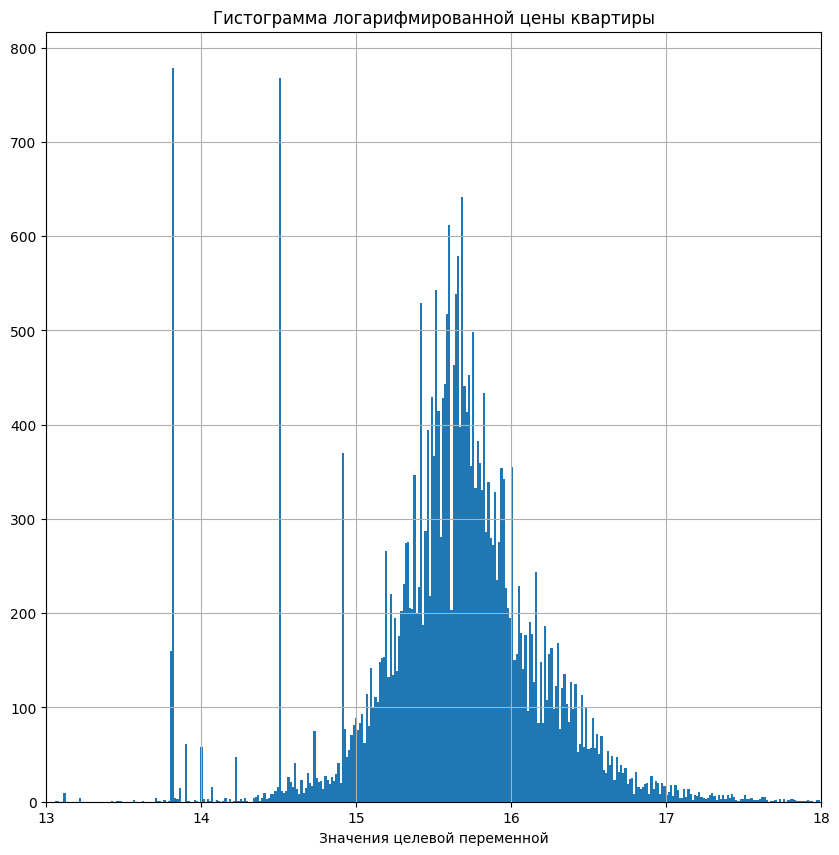

In [152]:
# Распределения таргета по годам

fig = plt.figure()
fig.set_size_inches(10, 10)

plt.hist(df['log_price_doc'], bins=500)
plt.xlabel('Значения целевой переменной')
plt.title('Гистограмма логарифмированной цены квартиры')
plt.grid()
plt.xlim((13, 18))
plt.show()

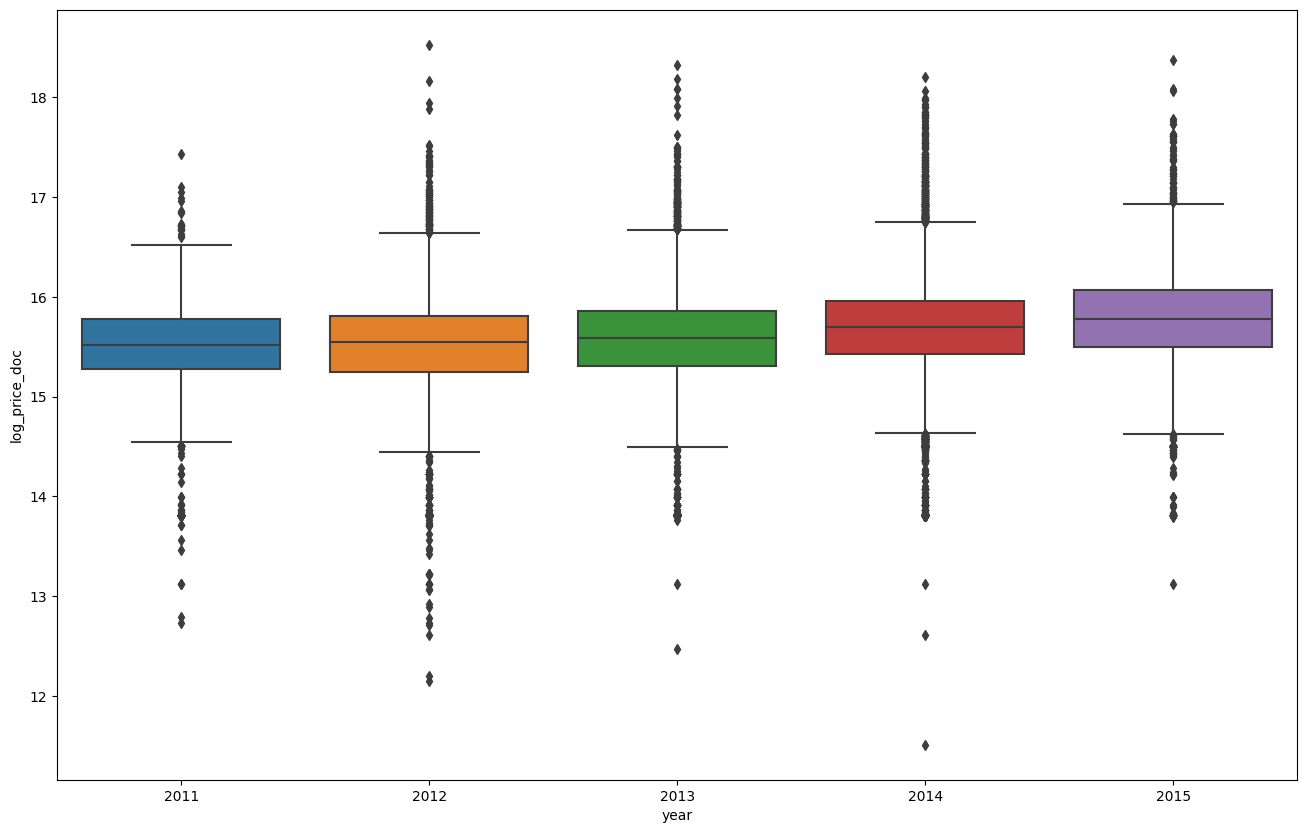

In [153]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['year'].astype('category'), data=df)
plt.show()

Видно, что средняя цена для каждого года различна и растёт.

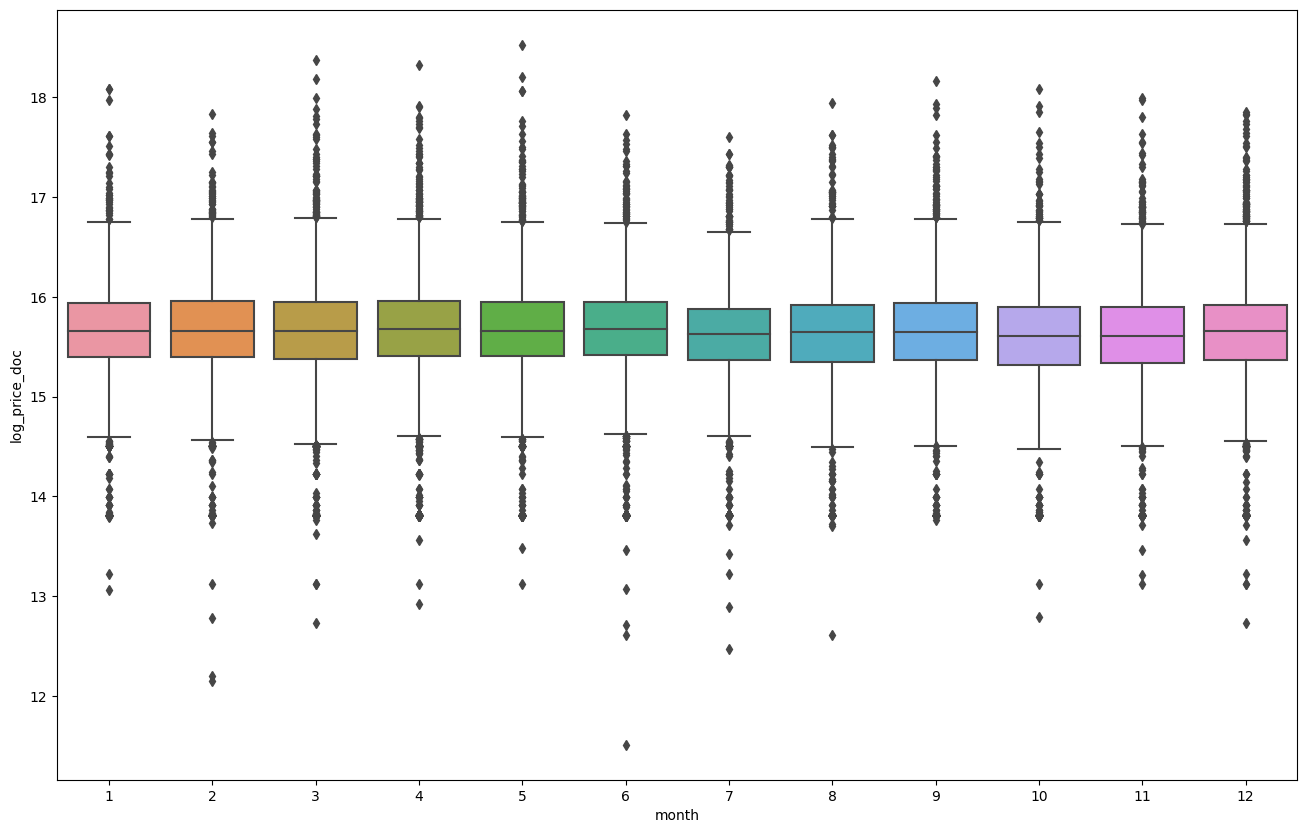

In [154]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['month'].astype('category'), data=df)
plt.show()

Видно, что средняя цена для каждого года различна и растёт.

In [155]:
### Закодируем колонку с месяцем и годом через One-Hot

for col in ['month', 'year']:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

df = df.drop('timestamp', axis=1)

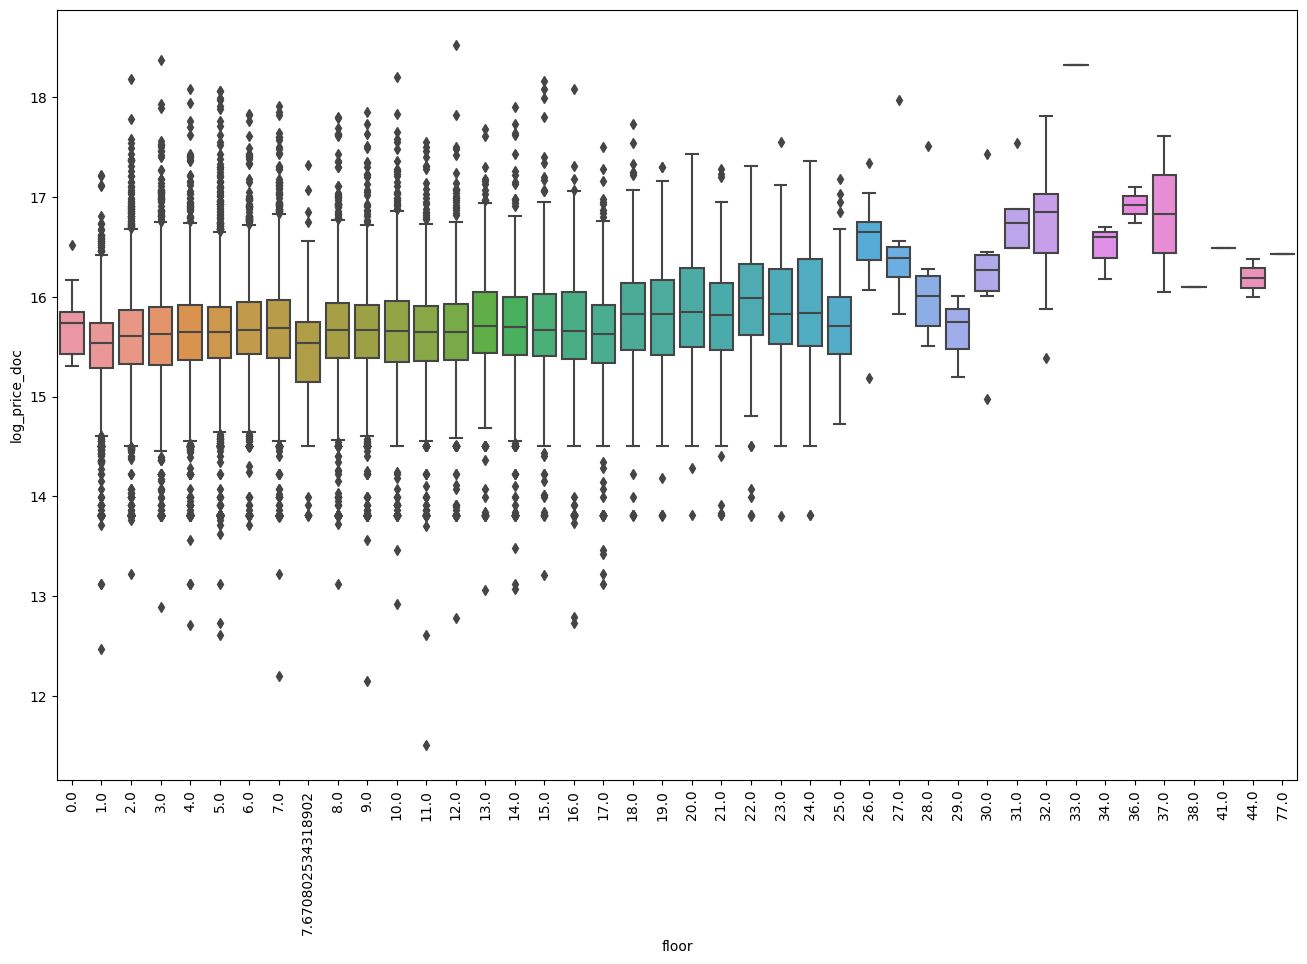

In [156]:
# Посмотрим, как этаж влияет на стоимость недвижимости

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['floor'].astype('category'), data=df)
plt.xticks(rotation=90)
plt.show()

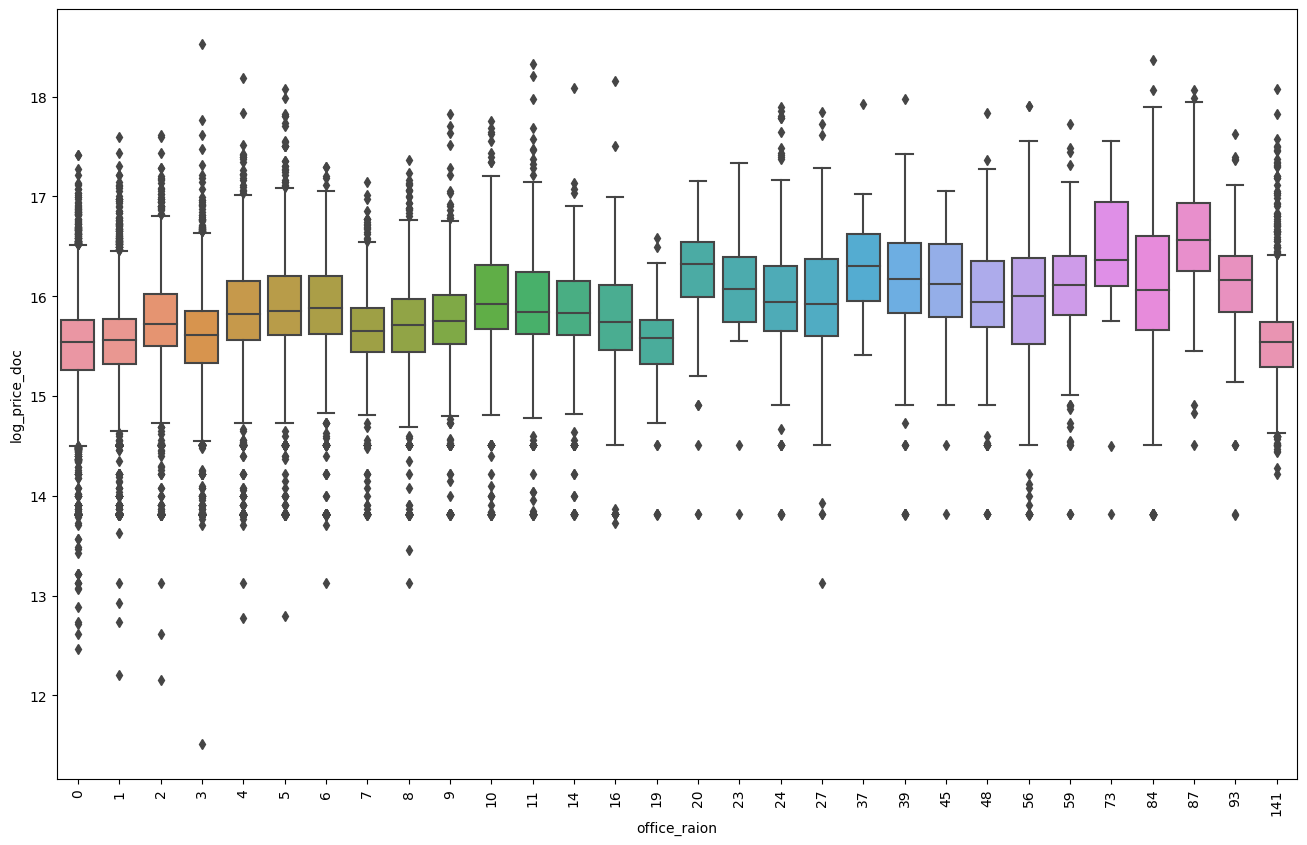

In [157]:
# Посмотрим, как количество офисов влияет на стоимость недвижимости

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['office_raion'].astype('category'), data=df)
plt.xticks(rotation=90)
plt.show()

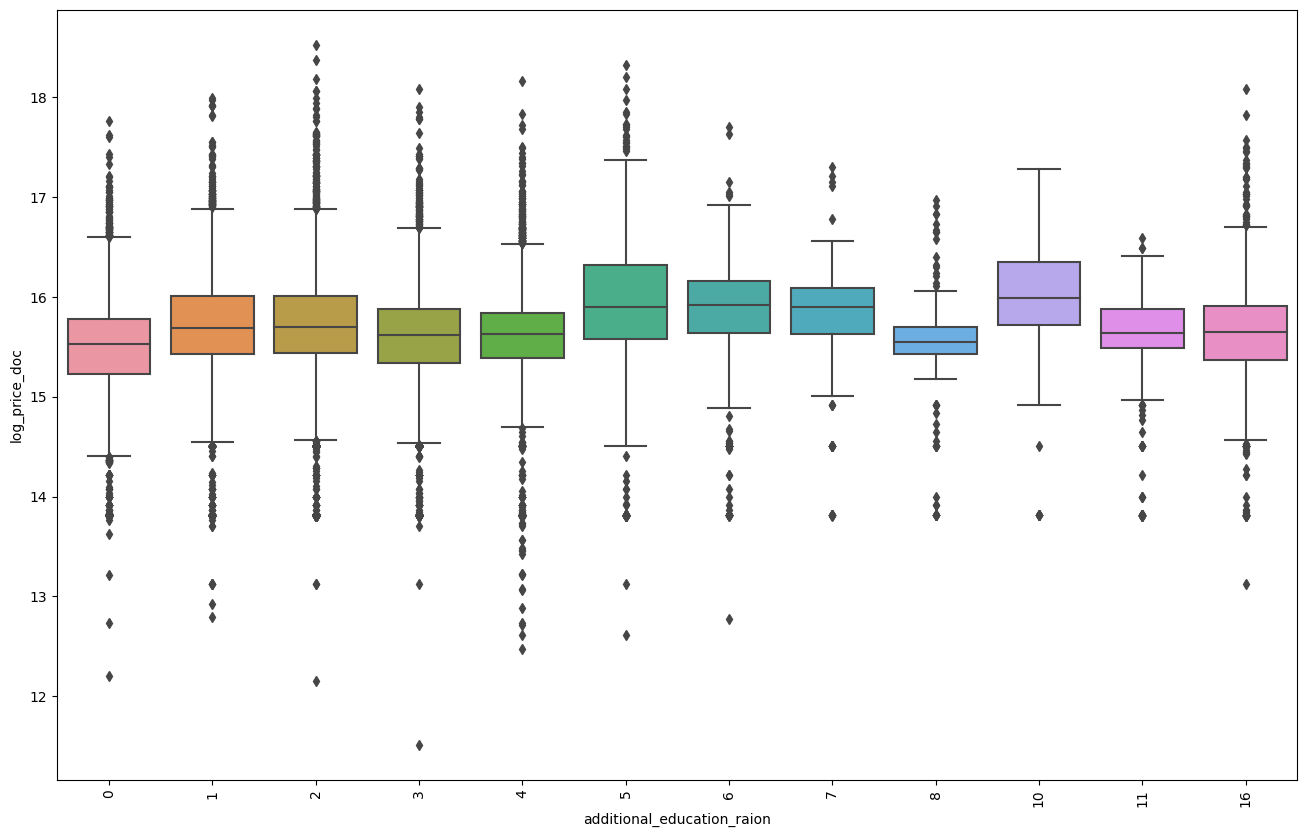

In [158]:
# Посмотрим, как количество офисов влияет на стоимость недвижимости

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['additional_education_raion'].astype('category'), data=df)
plt.xticks(rotation=90)
plt.show()

### Baseline

Теперь наши данные обладают временной структурой. Поэтому, чтобы получить хорошую обобщающую способность, мы хотим построить не просто модель, хорошо работающую на новых данных, а модель, которая угадывает распределение данных в будущем хотя бы на коротком горизонте. Поэтому, когда мы валидируем дизайн модели, нам важно делить на каждом шаге трейн и тест таким образом, чтобы по временной шкале они не пересекались, и точки из второго множества появлялись позже точек из первого.

Тип валидации стоит выбирать, исходя из задачи. Если нам важно хорошо предсказывать что-то для объектов из будущего, то TimeSplit - хорошая идея.

In [159]:
### Отделим таргеты от объектов

X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

In [160]:
### Конструкция для замера качества на Кросс-Валидации

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

train_losses = []
test_losses = []


for train_index, test_index in splitter.split(X):
        
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    preds_test = model.predict(x_test)
    preds_train = model.predict(x_train)
    
    error_test = np.mean((preds_test - y_test)**2)
    error_train = np.mean((preds_train - y_train)**2)
    
    test_losses.append(error_test)
    train_losses.append(error_train)

print(f"Среднее MSLE на тренировочных фолдах: {np.mean(train_losses).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {np.mean(test_losses).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.276
Среднее MSLE на тестовых фолдах: 0.385


In [161]:
### Функция cross-validate

from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_result = cross_validate(model, X, Y, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.276
Среднее MSLE на тестовых фолдах: 0.385


#### Lasso Regularization (L-1 Regularization)

In [162]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(max_iter=100000)

cv_result_lasso = cross_validate(model_lasso, X, Y,
                                 scoring='neg_mean_squared_error',
                                 cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.33
Среднее MSLE на тестовых фолдах: 0.36


In [163]:
# Добавим нормировку. Первый вариант - MinMaxScaler.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

lasso_pipe = Pipeline([('scaler', MinMaxScaler()), ('Lasso', Lasso(max_iter=100000))])
lasso_pipe.fit(X, Y)

cv_result_lasso_pipe = cross_validate(lasso_pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.382
Среднее MSLE на тестовых фолдах: 0.355


In [164]:
# Добавим нормировку. Второй вариант - StandartScaler.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))])
lasso_pipe.fit(X, Y)

cv_result_lasso_pipe = cross_validate(lasso_pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.382
Среднее MSLE на тестовых фолдах: 0.355


#### Ridge Regularization (L-2 Regularization)

In [165]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()

cv_result_ridge = cross_validate(model_ridge, X, Y,
                                 scoring='neg_mean_squared_error',
                                 cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_ridge['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_ridge['test_score']).round(3)}")

D:\code\ml-projects\Sberbank_Russian_Housing_Market\.env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.29356e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\code\ml-projects\Sberbank_Russian_Housing_Market\.env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.911e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\code\ml-projects\Sberbank_Russian_Housing_Market\.env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.00989e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Среднее MSLE на тренировочных фолдах: 0.277
Среднее MSLE на тестовых фолдах: 0.389


D:\code\ml-projects\Sberbank_Russian_Housing_Market\.env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.68803e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [166]:
# Добавим нормировку. Первый вариант - MinMaxScaler.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

ridge_pipe = Pipeline([('scaler', MinMaxScaler()), ('Ridge', Ridge())])
ridge_pipe.fit(X, Y)

cv_result_ridge_pipe = cross_validate(ridge_pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_ridge_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_ridge_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.278
Среднее MSLE на тестовых фолдах: 0.368


In [167]:
# Добавим нормировку. Второй вариант - StandartScaler.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge_pipe = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge())])
ridge_pipe.fit(X, Y)

cv_result_ridge_pipe = cross_validate(ridge_pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_ridge_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_ridge_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.276
Среднее MSLE на тестовых фолдах: 0.39


#### Подбор лучшего коэффициента L1-регуляризации

In [168]:
alphas = np.linspace(start=0.01, stop=1, num=30)

In [169]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(lasso_pipe, param_grid, 
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_}):")
print(search.best_params_)

Best parameter (CV score=-0.3358290202402139):
{'Lasso__alpha': 0.11241379310344828}


In [170]:
lasso_pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.11241379310344828, max_iter=100000))])

In [171]:
cv_result_lasso_pipe = cross_validate(lasso_pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso_pipe ['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso_pipe ['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.358
Среднее MSLE на тестовых фолдах: 0.336


#### Подбор лучшего коэффициента L2-регуляризации

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Ridge__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(ridge_pipe, param_grid, 
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_}):")
print(search.best_params_)

Best parameter (CV score=-0.3900974867595587):
{'Ridge__alpha': 1.0}


In [173]:
ridge_pipe.set_params(Ridge__alpha=search.best_params_['Ridge__alpha'])

Pipeline(steps=[('scaler', StandardScaler()), ('Ridge', Ridge())])

In [174]:
cv_result_ridge_pipe = cross_validate(ridge_pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_ridge_pipe ['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_ridge_pipe ['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.276
Среднее MSLE на тестовых фолдах: 0.39


### Анализ выбросов

In [175]:
data = pd.concat((X, Y), axis=1)

In [176]:
top_q = data['log_price_doc'].quantile(0.975)
low_q = data['log_price_doc'].quantile(0.025)

print(f"Топ 0,5% значение таргета: {top_q.round(2)}")
print(f"Топ 99,5% значение таргета: {low_q.round(2)}")

Топ 0,5% значение таргета: 16.7
Топ 99,5% значение таргета: 13.82


In [177]:
### Выбросим объекты со значениями вне отрезка [top 2,5%; top 97,5%]

data = data[(data['log_price_doc'] > low_q)&(data['log_price_doc'] <top_q)]

X_new, Y_new = data.drop('log_price_doc', axis=1), data['log_price_doc']

In [180]:
# Подберем новый коэффициент регуляризации
new_splitter = TimeSeriesSplit(n_splits=4)

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(lasso_pipe, param_grid, 
                      cv=new_splitter, scoring='neg_mean_squared_error')

search.fit(X_new, Y_new)

print(f"Best parameter (CV score={search.best_score_}):")
print(search.best_params_)

lasso_pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

new_cv_result_lasso_pipe = cross_validate(lasso_pipe, X_new, Y_new, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(new_cv_result_lasso_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(new_cv_result_lasso_pipe['test_score']).round(3)}")

Best parameter (CV score=-0.1889732547499555):
{'Lasso__alpha': 0.07827586206896552}
Среднее MSLE на тренировочных фолдах: 0.185
Среднее MSLE на тестовых фолдах: 0.189
